In [1]:
import requests
import pylab as pl
from pyquery import PyQuery as pq
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas as pd
from lxml import etree
import config
import os
from os import path
import seaborn as sns

%matplotlib inline

In [43]:
df_info = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'records-all-with-info.csv'))
df_info

,Unnamed: 0,topic_id,member_id,vote,name-en,name-ch,vote-date,vote-time,motion-en,motion-ch,mover-en,mover-ch,mover-type,vote-separate-mechanism
0,0,17/10/2012-1,TSANG Yok-sing,Present,TSANG Yok-sing,曾鈺成,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
1,1,17/10/2012-1,Albert HO,Yes,Albert HO,何俊仁,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
2,2,17/10/2012-1,LEE Cheuk-yan,Yes,LEE Cheuk-yan,李卓人,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
3,3,17/10/2012-1,James TO,Yes,James TO,涂謹申,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
4,4,17/10/2012-1,CHAN Kam-lam,No,CHAN Kam-lam,陳鑑林,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
5,5,17/10/2012-1,LEUNG Yiu-chung,Yes,LEUNG Yiu-chung,梁耀忠,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
6,6,17/10/2012-1,Dr LAU Wong-fat,No,Dr LAU Wong-fat,劉皇發,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
7,7,17/10/2012-1,Emily LAU,Yes,Emily LAU,劉慧卿,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
8,8,17/10/2012-1,TAM Yiu-chung,No,TAM Yiu-chung,譚耀宗,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes
9,9,17/10/2012-1,Abraham SHEK,No,Abraham SHEK,石禮謙,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,陳家洛議員對葉建源議員的「促請政府撤回'德育及國民教育科'課程指引及要求教育局局長吳克儉先生...,Dr Kenneth CHAN,陳家洛,Member,Yes


In [3]:
s_belief = []
s_pair = []
for (gname, g) in df_info.groupby(['mover-en', 'name-en']):
    #print(gname, '\n', g.vote.value_counts())
    value_counts = g.vote.value_counts()
    belief = value_counts.get('Yes', 0) / value_counts.sum()
    s_belief.append(belief)
    s_pair.append(gname)


In [4]:
df_belief = pd.DataFrame(s_belief, index=s_pair, columns = ['belief']).reset_index()
df_belief['mover'] = df_belief['index'].apply(lambda x: x[0])
df_belief['voter'] = df_belief['index'].apply(lambda x: x[1])
# DataFrame.pivot(index=None, columns=None, values=None)
df_belief_matrix = df_belief.pivot('mover', 'voter', 'belief')


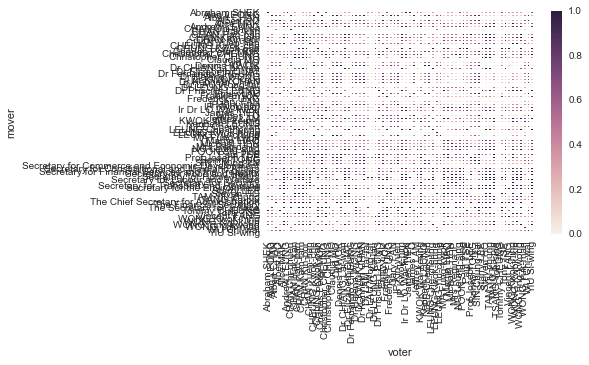

In [5]:
sns.heatmap(df_belief_matrix)

In [6]:
df_belief_matrix

voter,Abraham SHEK,Alan LEONG,Albert CHAN,Albert HO,Alice MAK,Andrew LEUNG,CHAN Chi-chuen,CHAN Hak-kan,CHAN Han-pan,CHAN Kam-lam,...,TSANG Yok-sing,Tommy CHEUNG,Tony TSE,Vincent FANG,WONG Kwok-hing,WONG Kwok-kin,WONG Ting-kwong,WONG Yuk-man,WU Chi-wai,YIU Si-wing
mover,,,,,,,,,,,,,,,,,,,,,
Abraham SHEK,1.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.333333,0.000000,0.333333,...,0,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.666667
Alan LEONG,0.000000,1.000000,0.750000,0.625000,0.250000,0.000000,0.875000,0.125000,0.000000,0.125000,...,0,0.250000,0.250000,0.000000,0.250000,0.250000,0.125000,0.500000,0.875000,0.250000
Albert CHAN,0.000000,0.010256,0.997436,0.002564,0.000000,0.000000,0.466667,0.002564,0.002564,0.002564,...,0,0.002564,0.002564,0.000000,0.002564,0.002564,0.002564,0.205128,0.007692,0.000000
Albert HO,0.000000,0.666667,0.888889,1.000000,0.333333,0.000000,0.888889,0.111111,0.000000,0.111111,...,0,0.222222,0.111111,0.111111,0.333333,0.222222,0.111111,0.666667,0.888889,0.000000
Alice MAK,0.200000,0.400000,0.400000,0.400000,1.000000,0.600000,0.200000,0.400000,0.600000,0.600000,...,0,0.200000,1.000000,0.200000,1.000000,0.400000,0.600000,0.400000,0.400000,0.600000
Andrew LEUNG,0.714286,0.214286,0.142857,0.071429,0.857143,1.000000,0.214286,0.714286,0.642857,1.000000,...,0,0.571429,0.785714,0.285714,0.857143,0.714286,0.928571,0.071429,0.142857,0.857143
CHAN Chi-chuen,0.001783,0.010695,0.545455,0.005348,0.000000,0.001783,0.989305,0.001783,0.001783,0.001783,...,0,0.001783,0.000000,0.003565,0.003565,0.001783,0.001783,0.098039,0.007130,0.000000
CHAN Hak-kan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
CHAN Han-pan,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,1.000000,1.000000,...,0,0.000000,1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000


In [7]:
possible_members = df_info.member_id.unique()
current_movers = df_belief_matrix.index
set(possible_members) - set(current_movers)

{'Dr LAM Tai-fai', 'TSANG Yok-sing'}

In [8]:
possible_movers = df_info[['mover-en', 'mover-ch']].drop_duplicates()
possible_movers.to_csv(path.join(config.DIR_DATA_ROOT, 'possible-movers.csv'))

In [9]:
df_pcs = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'voting-PC1to3.csv')).set_index('Unnamed: 0')
df_pcs.head()

,PC1,PC2,PC3
Unnamed: 0,,,
TSANG Yok-sing,-17.095649,-8.038985,-1.055447
Albert HO,-23.410446,4.679168,3.350926
LEE Cheuk-yan,-24.261251,6.265021,2.615829
James TO,-23.018250,3.624729,3.224040
CHAN Kam-lam,27.861223,2.062067,-4.897880


In [10]:
# Add non-existing movers
# e.g. {'Dr LAM Tai-fai', 'Prof Joseph LEE', 'TSANG Yok-sing'}
# does not have any motions. Put all zeros
df_belief_matrix = df_belief_matrix.T
for new_mover in set(possible_members) - set(current_movers):
    df_belief_matrix[new_mover] = pd.Series(np.zeros(len(possible_members)), index=df_belief_matrix.index)
df_belief_matrix = df_belief_matrix.T

# Reorder Mover
df_belief_matrix['PC1'] = df_pcs['PC1']
df_belief_matrix = df_belief_matrix.sort('PC1')
del df_belief_matrix['PC1']

# Reorder Voter
df_belief_matrix = df_belief_matrix.T
df_belief_matrix['PC1'] = df_pcs['PC1']
df_belief_matrix = df_belief_matrix.sort('PC1')
del df_belief_matrix['PC1']


# Change back to Mover as index and Voter as column
df_belief_matrix = df_belief_matrix.T

df_belief_matrix
#df_pcs

voter,LEUNG Kwok-hung,Albert CHAN,CHAN Chi-chuen,WONG Yuk-man,Gary FAN,Claudia MO,Cyd HO,LEE Cheuk-yan,LEUNG Yiu-chung,Dr Fernando CHEUNG,...,Tony TSE,Alice MAK,Andrew LEUNG,POON Siu-ping,CHAN Kam-lam,Christopher CHEUNG,Steven HO,WONG Ting-kwong,Ir Dr LO Wai-kwok,TAM Yiu-chung
mover,,,,,,,,,,,,,,,,,,,,,
LEUNG Kwok-hung,0.991557,0.624765,0.486867,0.113508,0.014071,0.004690,0.003752,0.003752,0.051595,0.004690,...,0.000000,0.000938,0.000000,0.000938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albert CHAN,0.453846,0.997436,0.466667,0.205128,0.151282,0.094872,0.007692,0.005128,0.025641,0.005128,...,0.002564,0.000000,0.000000,0.000000,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564
CHAN Chi-chuen,0.502674,0.545455,0.989305,0.098039,0.057041,0.051693,0.012478,0.010695,0.021390,0.010695,...,0.000000,0.000000,0.001783,0.005348,0.001783,0.000000,0.001783,0.001783,0.000000,0.001783
WONG Yuk-man,0.500000,0.689873,0.506329,0.987342,0.183544,0.215190,0.037975,0.044304,0.056962,0.044304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gary FAN,0.625000,0.650000,0.600000,0.300000,0.900000,0.500000,0.325000,0.350000,0.225000,0.325000,...,0.000000,0.050000,0.025000,0.100000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
Claudia MO,0.600000,0.680000,0.880000,0.520000,0.760000,1.000000,0.720000,0.600000,0.480000,0.720000,...,0.040000,0.120000,0.040000,0.200000,0.160000,0.080000,0.160000,0.120000,0.080000,0.120000
Cyd HO,0.548387,0.419355,0.516129,0.322581,0.580645,0.483871,0.741935,0.580645,0.451613,0.548387,...,0.032258,0.096774,0.032258,0.129032,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000
LEE Cheuk-yan,0.500000,0.576923,0.576923,0.384615,0.769231,0.653846,0.807692,0.807692,0.500000,0.692308,...,0.000000,0.230769,0.000000,0.423077,0.076923,0.000000,0.076923,0.076923,0.000000,0.076923
LEUNG Yiu-chung,0.666667,0.333333,0.333333,0.333333,0.666667,1.000000,1.000000,0.666667,1.000000,0.666667,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


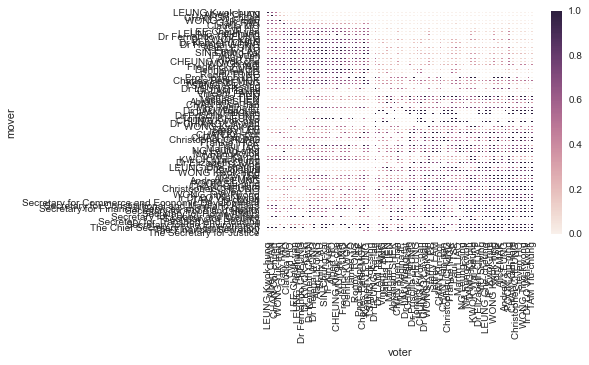

In [11]:
#figsize(20, 20)
sns.heatmap(df_belief_matrix)

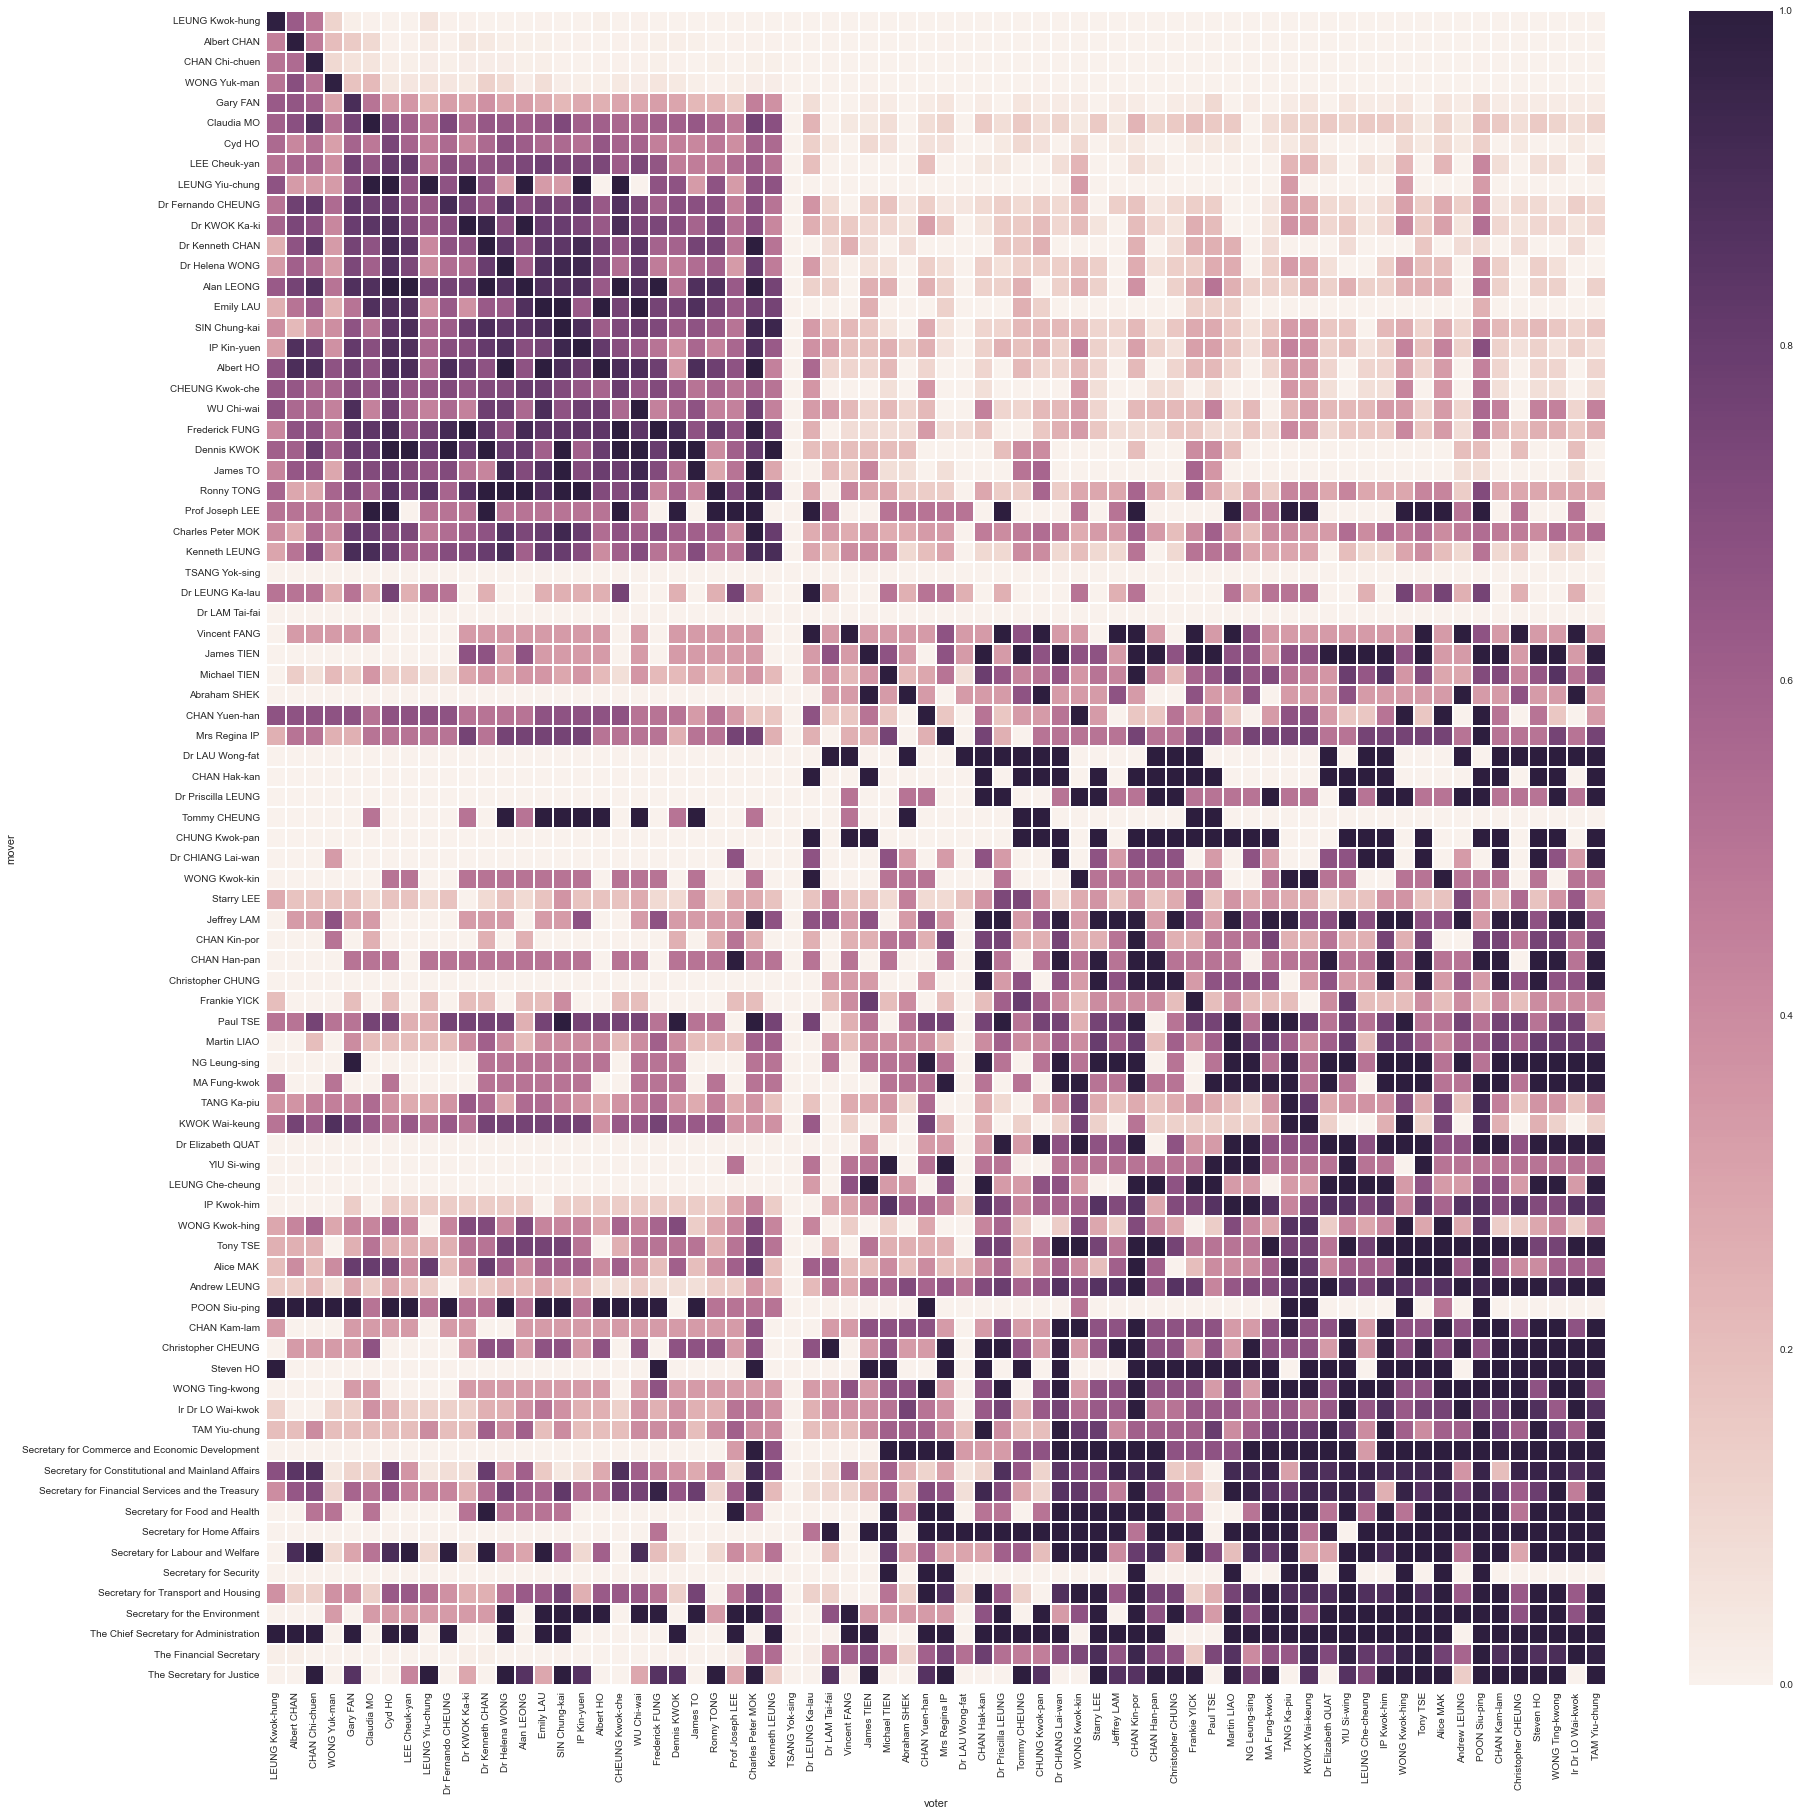

In [12]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_belief_matrix)

In [14]:
print('# of movers %s' % len(df_belief_matrix.index))
print('# of voters %s' % len(df_belief_matrix.columns))
for i in df_belief_matrix.index:
    print(i)

# of movers 82
# of voters 70
LEUNG Kwok-hung
Albert CHAN
CHAN Chi-chuen
WONG Yuk-man
Gary FAN
Claudia MO
Cyd HO
LEE Cheuk-yan
LEUNG Yiu-chung
Dr Fernando CHEUNG
Dr KWOK Ka-ki
Dr Kenneth CHAN
Dr Helena WONG
Alan LEONG
Emily LAU
SIN Chung-kai
IP Kin-yuen
Albert HO
CHEUNG Kwok-che
WU Chi-wai
Frederick FUNG
Dennis KWOK
James TO
Ronny TONG
Prof Joseph LEE
Charles Peter MOK
Kenneth LEUNG
TSANG Yok-sing
Dr LEUNG Ka-lau
Dr LAM Tai-fai
Vincent FANG
James TIEN
Michael TIEN
Abraham SHEK
CHAN Yuen-han
Mrs Regina IP
Dr LAU Wong-fat
CHAN Hak-kan
Dr Priscilla LEUNG
Tommy CHEUNG
CHUNG Kwok-pan
Dr CHIANG Lai-wan
WONG Kwok-kin
Starry LEE
Jeffrey LAM
CHAN Kin-por
CHAN Han-pan
Christopher CHUNG
Frankie YICK
Paul TSE
Martin LIAO
NG Leung-sing
MA Fung-kwok
TANG Ka-piu
KWOK Wai-keung
Dr Elizabeth QUAT
YIU Si-wing
LEUNG Che-cheung
IP Kwok-him
WONG Kwok-hing
Tony TSE
Alice MAK
Andrew LEUNG
POON Siu-ping
CHAN Kam-lam
Christopher CHEUNG
Steven HO
WONG Ting-kwong
Ir Dr LO Wai-kwok
TAM Yiu-chung
Secretary for Com

,mover-ch
mover-en,
Dr Kenneth CHAN,陳家洛
Frederick FUNG,馮檢基
IP Kin-yuen,葉建源
KWOK Wai-keung,郭偉强
SIN Chung-kai,單仲偕
Dr CHIANG Lai-wan,蔣麗芸
Michael TIEN,田北辰
Kenneth LEUNG,梁繼昌
CHEUNG Kwok-che,張國柱


In [39]:
transdict_mover = pd.DataFrame({'id': df_belief_matrix.index, 
                                'en': df_belief_matrix.index})#['mover-id', 'mover-en'])
transdict_mover['position'] = pd.Series(list(range(0, len(df_belief_matrix.index))))
transdict_mover = transdict_mover.set_index('id').join(
    df_info[['mover-en', 'mover-ch']].drop_duplicates().set_index('mover-en')
).rename(columns={'mover-ch': 'ch'})
transdict_mover.to_csv(path.join(config.DIR_DATA_ROOT, 'transdict-mover.csv'))

In [45]:
transdict_voter = pd.DataFrame({'id': df_belief_matrix.columns, 
                                'en': df_belief_matrix.columns})#['mover-id', 'mover-en'])
transdict_voter['position'] = pd.Series(list(range(0, len(df_belief_matrix.columns))))
transdict_voter = transdict_voter.set_index('id').join(
    df_info[['name-en', 'name-ch']].drop_duplicates().set_index('name-en')
).rename(columns={'name-ch': 'ch'})
transdict_voter.to_csv(path.join(config.DIR_DATA_ROOT, 'transdict-voter.csv'))

In [51]:
import json
open(path.join(config.DIR_DATA_ROOT, 'mv-relation.json'), 'w').write(
    json.dumps(df_belief_matrix.values.tolist()))

58295